# Comparing two jury rules simulation from Dekking 2005 - Question 6.11

Leon R. Adams

The simulation below is used to carry out the comparison of the two jury rules as found in Dekking 2005, Section 6.3. The challenge is to use a probabalistic model to choose between two competing scoring methodologies. Question 6.11 request that we reconsider the scenario by considering a third rule.  The International Skating Union decided to adopt a rule similiar to the following: randomly discard two of the jury scores, then average the remaining score. Describe how to investigate this rule.




In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#np.random.seed(123)

## Generating random scores

We will begin the analysis by constructing a model that will simulate the jury scoring of seven (7) judges. 

We generate 7 realizations from the uniform distribution from $U(0,1)$. 

In [4]:
Uniform_01 = np.random.rand(7)

In [5]:
print(Uniform_01)

[ 0.41730422  0.17299151  0.24462891  0.1198692   0.77078464  0.57096531
  0.13169182]


To generate realizations from $Z \sim U(-0.5, 0.5)$ uniform distribution, we subtract 0.5 from Uniform_01.

In [6]:
Z = Uniform_01 - 0.5

In [7]:
print(Z)

[-0.08269578 -0.32700849 -0.25537109 -0.3801308   0.27078464  0.07096531
 -0.36830818]


Deterministic part of jury score, set to be 8.

In [8]:
g = 8

Simulate stochastic behavior by adding noise to deterministic score.

In [9]:
Y = g + Z

In [10]:
print(Y)

[ 7.91730422  7.67299151  7.74462891  7.6198692   8.27078464  8.07096531
  7.63169182]


So, Y represents a simulated jury, with scores that have some deviations away from the true score.

## Model jury rules

We will know create models the two selection rules, where the first selection rule (h1) says:
> Discard highest and lowest, 
> then average remaining 5 scores

And the second selection rule (h2) says:
> Place item in ascending order,
> then pick the middle score

And the third selection rule (h3) says:
> randomly discard two of the jury scores,
> then average remaining 5 scores

In [11]:
discarded_two = np.random.choice(Y, 5, replace=False)

In [13]:
print(Y)
print(discarded_two)

[ 7.91730422  7.67299151  7.74462891  7.6198692   8.27078464  8.07096531
  7.63169182]
[ 7.63169182  8.27078464  8.07096531  7.91730422  7.67299151]


In [15]:
sortData = np.sort(Y)

In [16]:
print(sortData)

[ 7.6198692   7.63169182  7.67299151  7.74462891  7.91730422  8.07096531
  8.27078464]


In [17]:
middle5 = sortData[1:-1]
h1 = np.average(middle5)
h2 = sortData[3]
h3 = np.average(discarded_two)

In [18]:
print(middle5)

[ 7.63169182  7.67299151  7.74462891  7.91730422  8.07096531]


In [19]:
print(h1)

7.80751635595


In [20]:
print(h2)

7.744628911


In [21]:
print(h3)

7.91274750195


Given the selection rules, we can know look at the deviations from the true score (g = 8).

In [22]:
T = h1 - g
M = h2 - g
S = h3 - g

In [135]:
print(T)

-0.0320741161812


In [136]:
print(M)

-0.0614277553204


In [23]:
print(S)

-0.0872524980452


Now we can make a decision, which rule is better? Remember $T$ and $M$ are deviations from the true score, so which ever value is closer to zero $(0)$ in absolute should be considered better than the other.

In [24]:
abs_M = abs(M)
abs_T = abs(T)
abs_S = abs(S)

In [26]:
print('|M| = ', abs_M)
print('|T| = ', abs_T)
print('|S| = ', abs_S)

|M| =  0.255371088997
|T| =  0.192483644053
|S| =  0.0872524980452


We have design and built a simulation model, to help in answering the question: which jury rule is better?

## Leverage simulations

In [163]:
nsims = 5000

In [164]:
Uniform_array = np.random.rand(nsims, 7)
Zarray = Uniform_array - 0.5
Yarray = g + Zarray
discarded_two_array = np.array( [np.random.choice(jury, 5, replace=False) for jury in Yarray])

Yarray.sort(axis=1)
h2_vec = Yarray[:,3]
h1_vec = np.mean( Yarray[:,1:-1], axis=1)
h3_vec = np.mean( discarded_two_array[:,1:-1], axis=1)
M_vec = h2_vec - g
T_vec = h1_vec - g
S_vec = h3_vec - g

(0, 0.5)

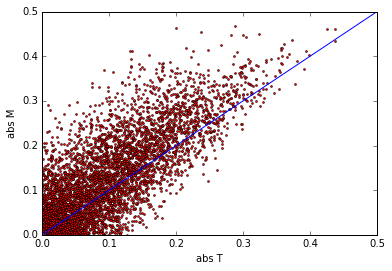

In [165]:
plt.plot(abs(T_vec), abs(M_vec), 'ro', markersize=2)
plt.plot([0,0.5],[0,0.5], 'b-')
plt.xlabel('abs T')
plt.ylabel('abs M')
plt.xlim((0,0.5))
plt.ylim((0,0.5))

Blue abline in plot above is an indication that T and M are an equal distance away from true 'g' score (Neither is preferred). However, plot has some indication that M has a **larger deviation** from 'g' than does T.

(0, 0.5)

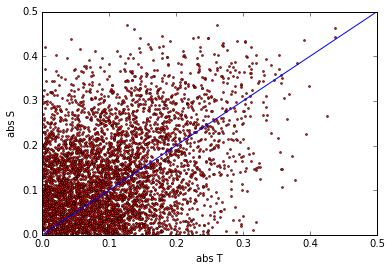

In [166]:
plt.plot(abs(T_vec), abs(S_vec), 'ro', markersize=2)
plt.plot([0,0.5],[0,0.5], 'b-')
plt.xlabel('abs T')
plt.ylabel('abs S')
plt.xlim((0,0.5))
plt.ylim((0,0.5))

(0, 0.5)

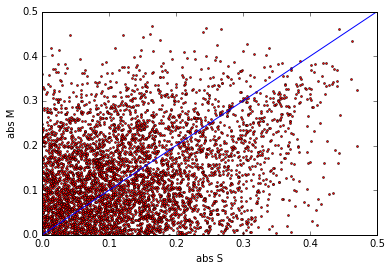

In [167]:
plt.plot(abs(S_vec), abs(M_vec), 'ro', markersize=2)
plt.plot([0,0.5],[0,0.5], 'b-')
plt.xlabel('abs S')
plt.ylabel('abs M')
plt.xlim((0,0.5))
plt.ylim((0,0.5))

By increasing the number of simulation we can get better probability estimate. And we can provide an answer to the question: which rule is better.

In [171]:
comparison_array = np.vstack( (np.abs(M_vec), np.abs(T_vec), np.abs(S_vec)) )

In [172]:
closet_to_zero = np.unique( np.ma.argmin(comparison_array, axis=0), return_counts=True )

In [173]:
print(closet_to_zero)

(array([0, 1, 2], dtype=int64), array([1146, 2122, 1732], dtype=int64))


In [174]:
rule_prob = 100* closet_to_zero[1]/ np.sum(closet_to_zero[1])

In [175]:
print(rule_prob)

[ 22.92  42.44  34.64]


In [176]:
rule_performance = dict(zip(['M_vec', 'T_vec', 'S_vec'], rule_prob))

In [177]:
best_rule = max(rule_performance.items(), key=lambda x: x[1])

In [178]:
print('{:s} rule has the best perfomance of the three (3) rules, coming closet to zero {} percent of the times'.format(*best_rule) )

T_vec rule has the best perfomance of the three (3) rules, coming closet to zero 42.44 percent of the times


In [179]:
print(rule_performance)

{'M_vec': 22.920000000000002, 'S_vec': 34.640000000000001, 'T_vec': 42.439999999999998}
